## importing the CSV file 

In [17]:
import pandas as pd

# Load your dataset
df = pd.read_csv("data.csv")

# See the first few rows
print(df.head())


                                                 url property_id  \
0  https://immovlan.be/en/detail/apartment/for-sa...    rbu58257   
1  https://immovlan.be/en/detail/apartment/for-sa...    rbu36061   
2  https://immovlan.be/en/detail/apartment/for-sa...    vbd48093   
3  https://immovlan.be/en/detail/apartment/for-sa...    rbu58259   
4  https://immovlan.be/en/detail/apartment/for-sa...    rbu36063   

  property_type          locality_name  postal_code  build_year   state  \
0     Apartment               Brussels       1000.0      2004.0  Normal   
1     Apartment               Turnhout       2300.0      2024.0     New   
2     Apartment  Berchem-Sainte-Agathe       1082.0      1939.0  Normal   
3     Apartment               Brussels       1000.0      2013.0  Normal   
4     Apartment               Turnhout       2300.0      2024.0     New   

   living_area  furnished  number_rooms  equipped_kitchen  terrace  facades  \
0         35.0        1.0           1.0               NaN    

## Remove duplicates

In [3]:
# Count duplicates before removing
print("Duplicates before:", df.duplicated().sum())

# Remove them
df = df.drop_duplicates()

print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


## Remove Blank Spaces in Text Columns

In [18]:
# Go through all text (object) columns and strip spaces
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()
display(df.head())    


,url,property_id,property_type,locality_name,postal_code,build_year,state,living_area,furnished,number_rooms,equipped_kitchen,terrace,facades,garden,garden_area,swimming_pool,price
0,https://immovlan.be/en/detail/apartment/for-sa...,rbu58257,Apartment,Brussels,1000.0,2004.0,Normal,35.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,225 000 €
1,https://immovlan.be/en/detail/apartment/for-sa...,rbu36061,Apartment,Turnhout,2300.0,2024.0,New,59.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,197 000 €
2,https://immovlan.be/en/detail/apartment/for-sa...,vbd48093,Apartment,Berchem-Sainte-Agathe,1082.0,1939.0,Normal,65.0,0.0,2.0,1.0,1.0,2.0,0,NaN,0,169 000 €
3,https://immovlan.be/en/detail/apartment/for-sa...,rbu58259,Apartment,Brussels,1000.0,2013.0,Normal,57.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,220 000 €
4,https://immovlan.be/en/detail/apartment/for-sa...,rbu36063,Apartment,Turnhout,2300.0,2024.0,New,66.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,225 000 €


## Handle Empty or Missing Values

In [19]:
import numpy as np

# Replace blank strings ("") with None
df = df.replace(r'^\s*$', np.nan, regex=True)

# Check how many missing values in each column
print(df.isna().sum())
df[df.isna().any(axis=1)]



url                    1
property_id            0
property_type        809
locality_name        190
postal_code          190
build_year          2996
state               2465
living_area         1203
furnished           3578
number_rooms         935
equipped_kitchen    5347
terrace             1077
facades             2490
garden                 0
garden_area         5914
swimming_pool          0
price                197
dtype: int64


,url,property_id,property_type,locality_name,postal_code,build_year,state,living_area,furnished,number_rooms,equipped_kitchen,terrace,facades,garden,garden_area,swimming_pool,price
0,https://immovlan.be/en/detail/apartment/for-sa...,rbu58257,Apartment,Brussels,1000.0,2004.0,Normal,35.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,225 000 €
1,https://immovlan.be/en/detail/apartment/for-sa...,rbu36061,Apartment,Turnhout,2300.0,2024.0,New,59.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,197 000 €
2,https://immovlan.be/en/detail/apartment/for-sa...,vbd48093,Apartment,Berchem-Sainte-Agathe,1082.0,1939.0,Normal,65.0,0.0,2.0,1.0,1.0,2.0,0,NaN,0,169 000 €
3,https://immovlan.be/en/detail/apartment/for-sa...,rbu58259,Apartment,Brussels,1000.0,2013.0,Normal,57.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,220 000 €
4,https://immovlan.be/en/detail/apartment/for-sa...,rbu36063,Apartment,Turnhout,2300.0,2024.0,New,66.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,225 000 €
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,https://immovlan.be/en/projectdetail/24794-009...,24794-00919214_om_9933,NaN,Willebroek,2830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,220 000 € - 515 000 €
7218,https://immovlan.be/en/projectdetail/25923-723...,25923-7235431,NaN,Nevele,9850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,372 900 € - 439 000 €
7219,https://immovlan.be/en/projectdetail/vi0002198,vi0002198,NaN,Visé,4600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,252 000 € - 465 000 €
7220,https://immovlan.be/en/projectdetail/2480528-r...,2480528-rmg01404929_om_246884,NaN,Antwerp,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,335 000 € - 700 000 €


## Fix Wrongly Encoded Values (e.g., text in numeric columns)

In [20]:
# Function to clean numeric columns
def to_number(s):
    return pd.to_numeric(
        s.astype(str).str.replace(r"[^\d\.\-]", "", regex=True),
        errors="coerce"
    )

# Apply to common numeric columns
numeric_cols = ["postal_code", "build_year", "living_area", "furnished","number_rooms", "facades", "garden_area","price"]

for col in numeric_cols:
    if col in df.columns:
        df[col] = to_number(df[col])
    
    # normalization for ALL boolean-like columns
    def normalize_bool(series):
        """
         Convert common yes/no, true/false formats into boolean (True/False).
         """
        return series.replace({
        "yes": True, "Yes": True, 1: True, "1": True, True: True,
        "no": False, "No": False, 0: False, "0": False, False: False
        })

    bool_cols = ["terrace","garden","swimming_pool"]

    for col in bool_cols:
        if col in df.columns:
           df[col] = normalize_bool(df[col]).fillna(0).astype(int)

    



        
print(df.info())         # check data types
print(df.isna().sum())   # missing values per column



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7222 entries, 0 to 7221
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               7221 non-null   object 
 1   property_id       7222 non-null   object 
 2   property_type     6413 non-null   object 
 3   locality_name     7032 non-null   object 
 4   postal_code       7032 non-null   float64
 5   build_year        4226 non-null   float64
 6   state             4757 non-null   object 
 7   living_area       6019 non-null   float64
 8   furnished         3644 non-null   float64
 9   number_rooms      6287 non-null   float64
 10  equipped_kitchen  1875 non-null   float64
 11  terrace           7222 non-null   int64  
 12  facades           4732 non-null   float64
 13  garden            7222 non-null   int64  
 14  garden_area       1308 non-null   float64
 15  swimming_pool     7222 non-null   int64  
 16  price             6431 non-null   float64


C:\Users\welde\AppData\Local\Temp\ipykernel_9220\1365606982.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.replace({
C:\Users\welde\AppData\Local\Temp\ipykernel_9220\1365606982.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.replace({
C:\Users\welde\AppData\Local\Temp\ipykernel_9220\1365606982.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in t

## remove columuns (furnished,equipped_kitchen and garden area), remove the properties without prices

In [132]:
#df = df.drop(['furnished', 'equipped_kitchen', 'garden_area'], axis=1)
df = df[df["price"].notna()] # remove the properties without prices

#Categorical features: fill with "unknown".

cat_cols = ["property_type", "locality_name", "state", "region"]

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna("unknown").str.lower().str.replace(r"\s+", " ", regex=True)







## Saving cleaned data

In [5]:
df.to_csv("analysis/welde/data_cleaned.csv", index=False)
print("Cleaned file saved as data_cleaned.csv")



Cleaned file saved as data_cleaned.csv


## displaying the final data

In [6]:
display(df.head())    


,url,property_id,property_type,locality_name,postal_code,build_year,state,living_area,furnished,number_rooms,equipped_kitchen,terrace,facades,garden,garden_area,swimming_pool,price
0,https://immovlan.be/en/detail/apartment/for-sa...,rbu58257,Apartment,Brussels,1000.0,2004.0,Normal,35.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,225 000 €
1,https://immovlan.be/en/detail/apartment/for-sa...,rbu36061,Apartment,Turnhout,2300.0,2024.0,New,59.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,197 000 €
2,https://immovlan.be/en/detail/apartment/for-sa...,vbd48093,Apartment,Berchem-Sainte-Agathe,1082.0,1939.0,Normal,65.0,0.0,2.0,1.0,1.0,2.0,0,NaN,0,169 000 €
3,https://immovlan.be/en/detail/apartment/for-sa...,rbu58259,Apartment,Brussels,1000.0,2013.0,Normal,57.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,220 000 €
4,https://immovlan.be/en/detail/apartment/for-sa...,rbu36063,Apartment,Turnhout,2300.0,2024.0,New,66.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,225 000 €


## Analysis and comparisons

Number of price outliers: 0


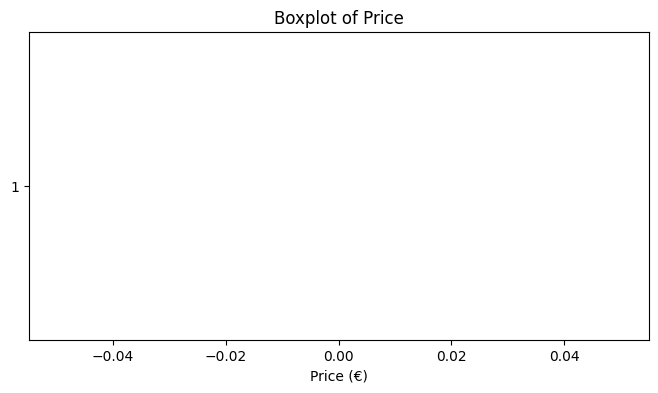

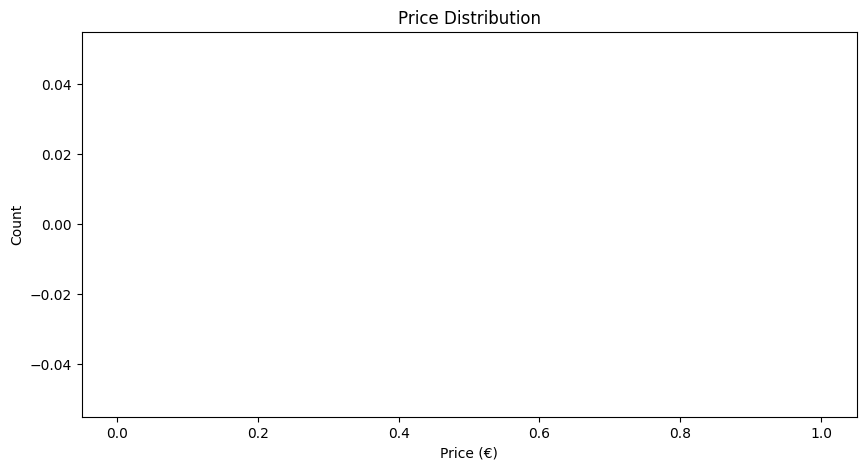

region
brussels   NaN
flanders   NaN
unknown    NaN
wallonia   NaN
Name: price, dtype: float64

In [16]:
import matplotlib.pyplot as plt
# Ensure price is numeric

df["price"] = pd.to_numeric(df["price"], errors="coerce")

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

print("Number of price outliers:", len(outliers))
outliers.head()

plt.figure(figsize=(8,4))
plt.boxplot(df["price"].dropna(), vert=False)
plt.title("Boxplot of Price")
plt.xlabel("Price (€)")
plt.show()


#Identify outliers visually using a histogram

plt.figure(figsize=(10,5))
plt.hist(df["price"].dropna(), bins=60)
plt.title("Price Distribution")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.show()

# separate for outliers



# Extract outliers into a separate DataFrame
price_outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

# Show number of outliers
#print("Number of price outliers:", len(price_outliers))

# Display the first few outliers
#price_outliers.head()



#correlation
df.corr(numeric_only=True)["price"].sort_values(ascending=False)   # correlation of Price

# add regions
def postal_to_region(code):
    if pd.isna(code):
        return "unknown"
    if 1000 <= code <= 1299:
        return "brussels"
    if (1300 <= code <= 1499) or (4000 <= code <= 7999):
        return "wallonia"
    if (1500 <= code <= 3990) or (8000 <= code <= 9992):
        return "flanders"
    return "unknown"
    
df["region"] = df["postal_code"].apply(postal_to_region)
price_outliers
df.groupby("region")["price"].median()
#df.isna().sum()



## data distributions


# global price distribution


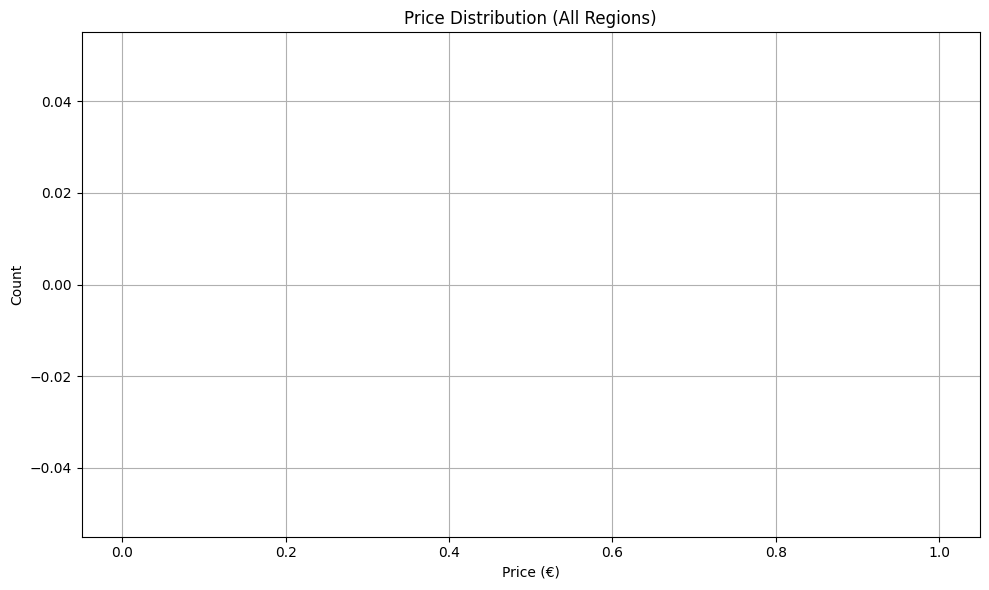

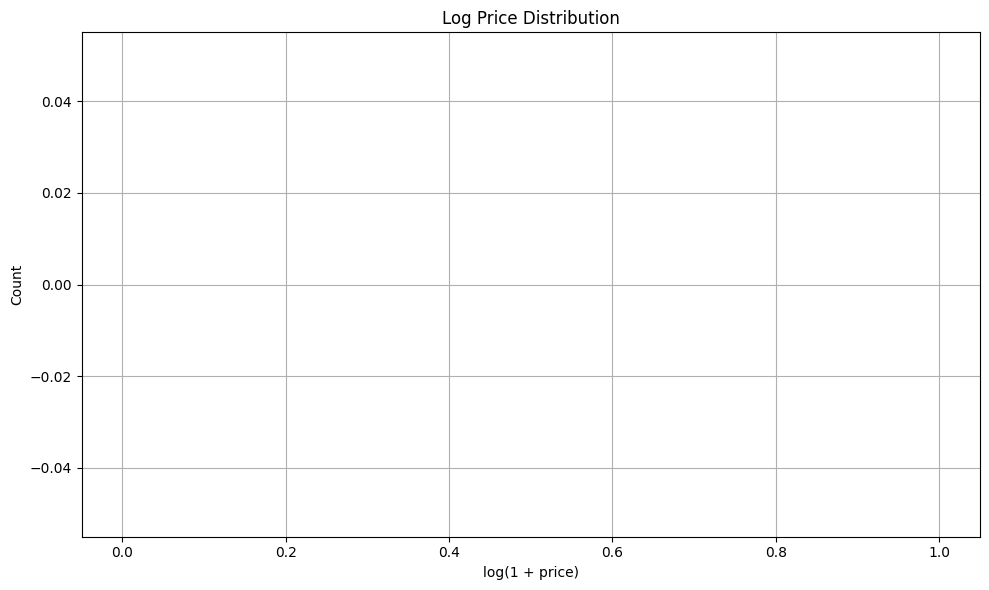

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df["price"].hist(bins=80)
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.title("Price Distribution (All Regions)")
plt.tight_layout()
plt.show()
# 
import numpy as np

plt.figure(figsize=(10,6))
np.log1p(df["price"]).hist(bins=80)
plt.xlabel("log(1 + price)")
plt.ylabel("Count")
plt.title("Log Price Distribution")
plt.tight_layout()
plt.show()


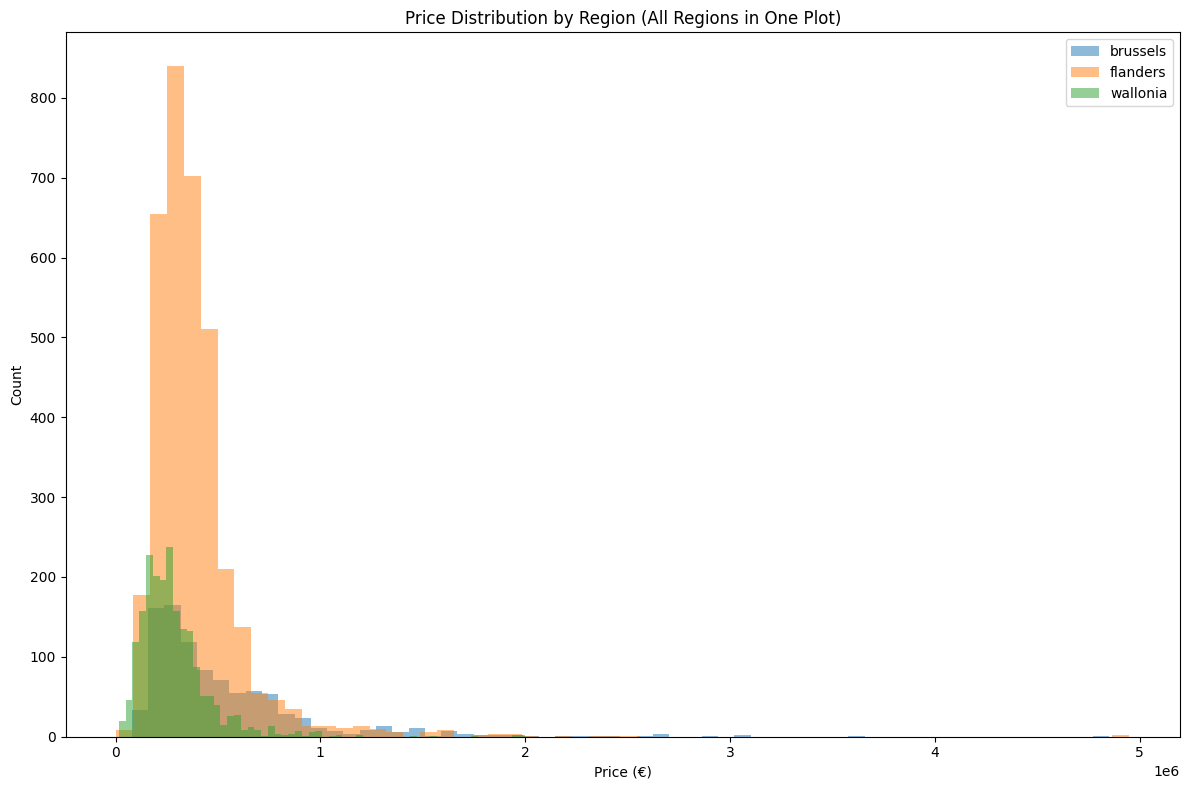

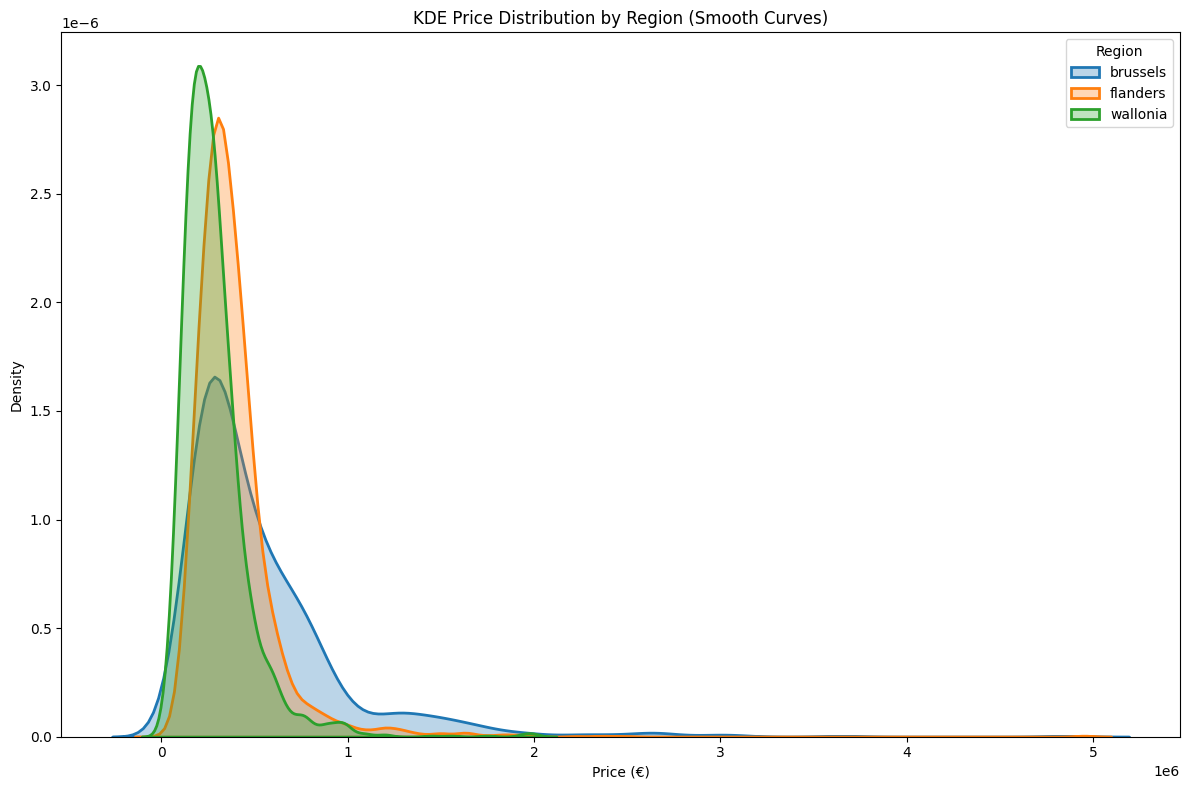

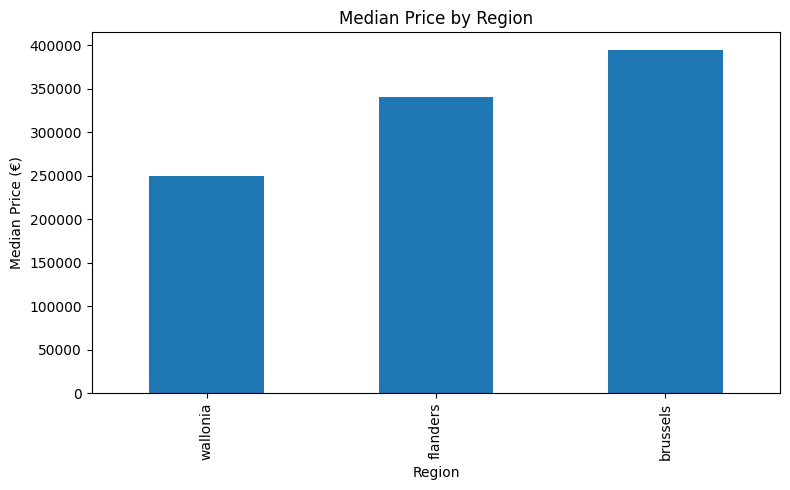

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df["price"].notna() & (df["price"] > 0)]


# Ensure price is numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Keep only valid prices
df_valid = df[df["price"].notna() & (df["price"] > 0)]

# Get regions with valid price data
regions = df_valid["region"].dropna().unique()

plt.figure(figsize=(12,8))

# Loop and plot all price distributions in one histogram
for region in regions:
    subset = df_valid[df_valid["region"] == region]["price"]
    if subset.dropna().empty:
        continue
    plt.hist(subset, bins=60, alpha=0.5, label=region)

plt.title("Price Distribution by Region (All Regions in One Plot)")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

#KDE


# Ensure price is numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Keep only valid positive prices
df_valid = df[df["price"].notna() & (df["price"] > 0)]

plt.figure(figsize=(12,8))

# Plot KDE for each region
for region in df_valid["region"].dropna().unique():
    sns.kdeplot(
        df_valid[df_valid["region"] == region]["price"],
        label=region,
        fill=True,
        alpha=0.3,
        linewidth=2
    )

plt.title("KDE Price Distribution by Region (Smooth Curves)")
plt.xlabel("Price (€)")
plt.ylabel("Density")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

#by median
median_price = df.groupby("region")["price"].median().sort_values()

median_price.plot(kind="bar", figsize=(8,5))
plt.title("Median Price by Region")
plt.xlabel("Region")
plt.ylabel("Median Price (€)")
plt.tight_layout()
plt.show()




# <B> DELIVERABLES

## load the data and setting the libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")  # clean default style
df = pd.read_csv("data.csv")   #loading the dataset
df.head()


,url,property_id,property_type,locality_name,postal_code,build_year,state,living_area,furnished,number_rooms,equipped_kitchen,terrace,facades,garden,garden_area,swimming_pool,price
0,https://immovlan.be/en/detail/apartment/for-sa...,rbu58257,Apartment,Brussels,1000.0,2004.0,Normal,35.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,225 000 €
1,https://immovlan.be/en/detail/apartment/for-sa...,rbu36061,Apartment,Turnhout,2300.0,2024.0,New,59.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,197 000 €
2,https://immovlan.be/en/detail/apartment/for-sa...,vbd48093,Apartment,Berchem-Sainte-Agathe,1082.0,1939.0,Normal,65.0,0.0,2.0,1.0,1.0,2.0,0,NaN,0,169 000 €
3,https://immovlan.be/en/detail/apartment/for-sa...,rbu58259,Apartment,Brussels,1000.0,2013.0,Normal,57.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,220 000 €
4,https://immovlan.be/en/detail/apartment/for-sa...,rbu36063,Apartment,Turnhout,2300.0,2024.0,New,66.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,225 000 €


## 1) How many observations and features/columns do you have?

In [133]:
# Number of rows (observations) and columns (features)
n_rows, n_cols = df.shape
print(f"Observations: {n_rows}, Features: {n_cols}")

# Quick structural overview
df.info()


Observations: 7222, Features: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7222 entries, 0 to 7221
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               7221 non-null   object 
 1   property_id       7222 non-null   object 
 2   property_type     6413 non-null   object 
 3   locality_name     7032 non-null   object 
 4   postal_code       7032 non-null   float64
 5   build_year        4226 non-null   float64
 6   state             4757 non-null   object 
 7   living_area       6019 non-null   float64
 8   furnished         3644 non-null   float64
 9   number_rooms      6287 non-null   float64
 10  equipped_kitchen  1875 non-null   float64
 11  terrace           6145 non-null   float64
 12  facades           4732 non-null   float64
 13  garden            7222 non-null   int64  
 14  garden_area       1308 non-null   float64
 15  swimming_pool     7222 non-null   int64  
 16  price    

# 2) What is the proportion of missing values per column?

In [ ]:
# missing count + percentage
mmissing_counts = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

missing_summary
df["price"].head(20)
df["price"].dtype
display(df.head())


# Convert to string
df["price"] = df["price"].astype(str)

# Remove euro symbol
df["price"] = df["price"].str.replace("€", "", regex=False)

# Remove normal spaces
df["price"] = df["price"].str.replace(" ", "")

# Remove NON-BREAKING thin space (the one between 225 000)
df["price"] = df["price"].str.replace("\u202f", "")   # narrow no-break space
df["price"] = df["price"].str.replace("\xa0", "")     # non-breaking space

# Remove thousands separators if any remain
df["price"] = df["price"].str.replace(",", "")
df["price"] = df["price"].str.replace(".", "")

# Remove empty strings
df["price"] = df["price"].replace("", np.nan)

# Convert to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df




,url,property_id,property_type,locality_name,postal_code,build_year,state,living_area,furnished,number_rooms,equipped_kitchen,terrace,facades,garden,garden_area,swimming_pool,price
0,https://immovlan.be/en/detail/apartment/for-sa...,rbu58257,Apartment,Brussels,1000.0,2004.0,Normal,35.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,225000.0
1,https://immovlan.be/en/detail/apartment/for-sa...,rbu36061,Apartment,Turnhout,2300.0,2024.0,New,59.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,197000.0
2,https://immovlan.be/en/detail/apartment/for-sa...,vbd48093,Apartment,Berchem-Sainte-Agathe,1082.0,1939.0,Normal,65.0,0.0,2.0,1.0,1.0,2.0,0,NaN,0,169000.0
3,https://immovlan.be/en/detail/apartment/for-sa...,rbu58259,Apartment,Brussels,1000.0,2013.0,Normal,57.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,220000.0
4,https://immovlan.be/en/detail/apartment/for-sa...,rbu36063,Apartment,Turnhout,2300.0,2024.0,New,66.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,225000.0


,url,property_id,property_type,locality_name,postal_code,build_year,state,living_area,furnished,number_rooms,equipped_kitchen,terrace,facades,garden,garden_area,swimming_pool,price
0,https://immovlan.be/en/detail/apartment/for-sa...,rbu58257,Apartment,Brussels,1000.0,2004.0,Normal,35.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,2250000.0
1,https://immovlan.be/en/detail/apartment/for-sa...,rbu36061,Apartment,Turnhout,2300.0,2024.0,New,59.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,1970000.0
2,https://immovlan.be/en/detail/apartment/for-sa...,vbd48093,Apartment,Berchem-Sainte-Agathe,1082.0,1939.0,Normal,65.0,0.0,2.0,1.0,1.0,2.0,0,NaN,0,1690000.0
3,https://immovlan.be/en/detail/apartment/for-sa...,rbu58259,Apartment,Brussels,1000.0,2013.0,Normal,57.0,1.0,1.0,NaN,1.0,2.0,0,NaN,0,2200000.0
4,https://immovlan.be/en/detail/apartment/for-sa...,rbu36063,Apartment,Turnhout,2300.0,2024.0,New,66.0,0.0,1.0,NaN,1.0,3.0,0,NaN,0,2250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,https://immovlan.be/en/projectdetail/24794-009...,24794-00919214_om_9933,NaN,Willebroek,2830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN
7218,https://immovlan.be/en/projectdetail/25923-723...,25923-7235431,NaN,Nevele,9850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN
7219,https://immovlan.be/en/projectdetail/vi0002198,vi0002198,NaN,Visé,4600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN
7220,https://immovlan.be/en/projectdetail/2480528-r...,2480528-rmg01404929_om_246884,NaN,Antwerp,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN


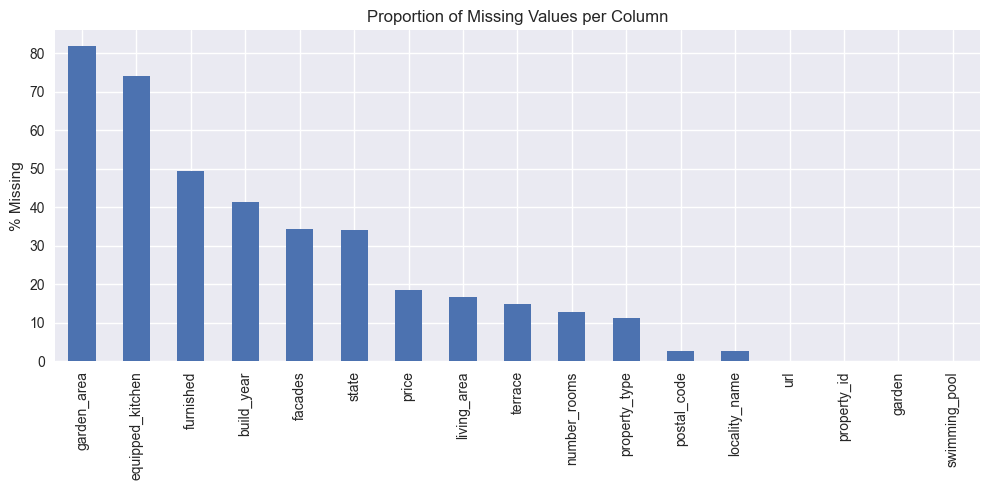

In [137]:
# Visualization
missing_summary["missing_pct"].plot(kind="bar", figsize=(10,5))
plt.ylabel("% Missing")
plt.title("Proportion of Missing Values per Column")
plt.tight_layout()
plt.show()


#  ----------------data cleaning -------------

In [144]:
# Standardize Column Names
df.columns = (
    df.columns.str.strip()
               .str.lower()
               .str.replace(r"[^a-z0-9]+", "_", regex=True)
               .str.strip("_")
)
# Remove Duplicates

print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

# Clean Text Columns

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

# Convert Key Columns to Numeric

numeric_cols = ["price", "living_area", "number_rooms", "build_year", "facades", "postal_code"]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

        # Normalize Booleans (terrace, garden, pool)
        
bool_cols = ["terrace", "garden", "swimming_pool"]

for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().map({
            "1": 1, "0": 0,
            "yes": 1, "no": 0,
            "true": 1, "false": 0
        }).fillna(0).astype(int)


#########    Handle Invalid Values   ########

# Price 

# Convert to string
df["price"] = df["price"].astype(str)

# Remove euro symbol
df["price"] = df["price"].str.replace("€", "", regex=False)

# Remove normal spaces
df["price"] = df["price"].str.replace(" ", "")

# Remove NON-BREAKING thin space (the one between 225 000)
df["price"] = df["price"].str.replace("\u202f", "")   # narrow no-break space
df["price"] = df["price"].str.replace("\xa0", "")     # non-breaking space

# Remove thousands separators if any remain
df["price"] = df["price"].str.replace(",", "")
df["price"] = df["price"].str.replace(".", "")

# Remove empty strings
df["price"] = df["price"].replace("", np.nan)

# Convert to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df = df[(df["price"].notna()) & (df["price"] > 0)]

df["price"].isna().sum()





Duplicates before: 0
Duplicates after: 0


np.int64(0)

## Maping Postal Code into Region

In [145]:
def postal_to_region(code):
    if pd.isna(code):
        return "unknown"
    if 1000 <= code <= 1299:
        return "brussels"
    if (1300 <= code <= 1499) or (4000 <= code <= 7999):
        return "wallonia"
    if (1500 <= code <= 3990) or (8000 <= code <= 9992):
        return "flanders"
    return "unknown"

df["region"] = df["postal_code"].apply(postal_to_region)



<b> Remarks: While certain variables, like build_year, facades, and state, have significant missingness, others, like pricing and property_id  have relatively little incomplete data.


# 3) Which variables would you delete and why?

#### URL , property_id(postal_code???) because they are identifiers,not explanatory variables. they are unique and useful for tracking but not for the price.  inaddition we want to remove furnished, equipped_kitchen and garden_area due to their relevance and mostly missing data

In [146]:
# Columns where almost all values are unique 
high_card = df.nunique().sort_values(ascending=False)
high_card

# Columns with (almost) constant values
low_var = df.nunique().sort_values()
low_var

equipped_kitchen       1
terrace                1
garden                 2
furnished              2
swimming_pool          2
region                 3
facades                4
state                 10
property_type         16
number_rooms          22
build_year           168
living_area          473
garden_area          487
postal_code          584
locality_name        905
price               1066
url                 5887
property_id         5887
dtype: int64

 # 4) What variables are most subject to outliers?

In [147]:
# numeric summary + IQR outlier flag

num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].describe(percentiles=[0.01, 0.05, 0.95, 0.99]).T






,count,mean,std,min,1%,5%,50%,95%,99%,max
postal_code,5887.0,5.001489e+03,2.886316e+03,1000.0,1000.0,1.050000e+03,4.287000e+03,9.550000e+03,9.940000e+03,9.991000e+03
build_year,3906.0,1.976888e+03,4.436437e+01,1500.0,1850.0,1.900000e+03,1.978000e+03,2.025000e+03,2.026950e+03,2.028000e+03
living_area,5487.0,1.603922e+02,1.227957e+02,1.0,35.0,5.500000e+01,1.360000e+02,3.417000e+02,6.015400e+02,2.350000e+03
furnished,3290.0,5.775076e-02,2.333070e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
number_rooms,5682.0,2.905667e+00,1.636337e+00,0.0,1.0,1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,5.000000e+01
equipped_kitchen,1562.0,1.000000e+00,0.000000e+00,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
terrace,5887.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
facades,4192.0,2.756918e+00,8.265603e-01,1.0,2.0,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
garden,5887.0,5.705792e-01,4.950356e-01,0.0,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
garden_area,1118.0,8.666592e+02,6.537654e+03,3.0,11.0,2.500000e+01,2.175000e+02,2.014700e+03,6.853580e+03,2.000000e+05


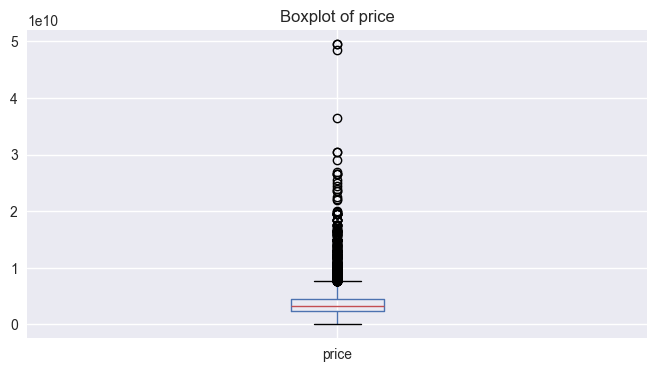

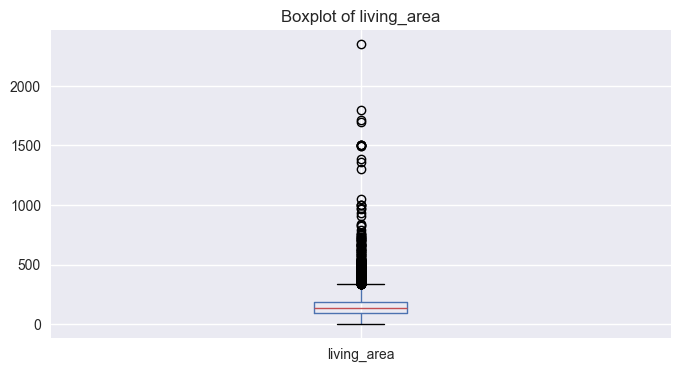

count    5.887000e+03
mean     3.870462e+09
std      2.878144e+09
min      3.713000e+07
25%      2.350000e+09
50%      3.250000e+09
75%      4.450000e+09
max      4.950000e+10
Name: price, dtype: float64

In [148]:
# boxplots
for col in ["price", "living_area", "price_per_m2"]:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        df.boxplot(column=col)
        plt.title(f"Boxplot of {col}")
        plt.show()
df["price"].head(20)
df["price"].describe()




# 5. How many qualitative and quantitative variables? Visuals and correlation measures?

In [149]:
quantitative = df.select_dtypes(include=[np.number]).columns.tolist()
qualitative = df.select_dtypes(include=["object"]).columns.tolist()

print("Quantitative:", quantitative)
print("Qualitative:", qualitative)
print(f"# Quantitative: {len(quantitative)}, # Qualitative: {len(qualitative)}")


Quantitative: ['postal_code', 'build_year', 'living_area', 'furnished', 'number_rooms', 'equipped_kitchen', 'terrace', 'facades', 'garden', 'garden_area', 'swimming_pool', 'price']
Qualitative: ['url', 'property_id', 'property_type', 'locality_name', 'state', 'region']
# Quantitative: 12, # Qualitative: 6


# 6. What is the correlation between variables and price?

In [150]:
num_cols = df.select_dtypes(include=[np.number]).columns
corr_with_price = df[num_cols].corr()["price"].sort_values(ascending=False)
corr_with_price


price               1.000000
living_area         0.602213
number_rooms        0.461827
swimming_pool       0.211755
facades             0.190407
garden              0.153937
garden_area         0.128758
build_year          0.028707
furnished           0.017941
postal_code        -0.090161
equipped_kitchen         NaN
terrace                  NaN
Name: price, dtype: float64

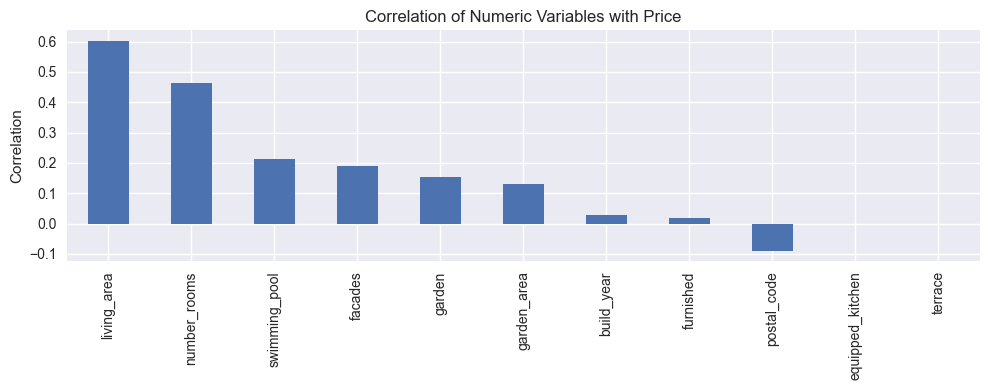

In [151]:
corr_with_price.drop("price").plot(kind="bar", figsize=(10,4))
plt.title("Correlation of Numeric Variables with Price")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()


<b> Larger properties are typically more expensive, as seen by the significant correlation between price and living area and number of rooms. Geographical factors like postal code and location can have a big impact on prices. Because they are less common and frequently found in particular house types and upscale properties, things like gardens, terraces, and pools have a favorable but more limited impact. 

### catagorical variables

In [152]:
df.groupby("region")["price"].median()
df.groupby("property_type")["price"].median()
df.groupby("state")["price"].median()


state
Excellent             3.950000e+09
Fully renovated       3.100000e+09
New                   3.850000e+09
Normal                2.990000e+09
To be renovated       2.455000e+09
To demolish           2.590000e+09
To renovate           2.495000e+09
To restore            2.670000e+09
Under construction    2.200000e+09
nan                   3.167000e+09
Name: price, dtype: float64

# 7. How are variables correlated with each other? Groups of variables?

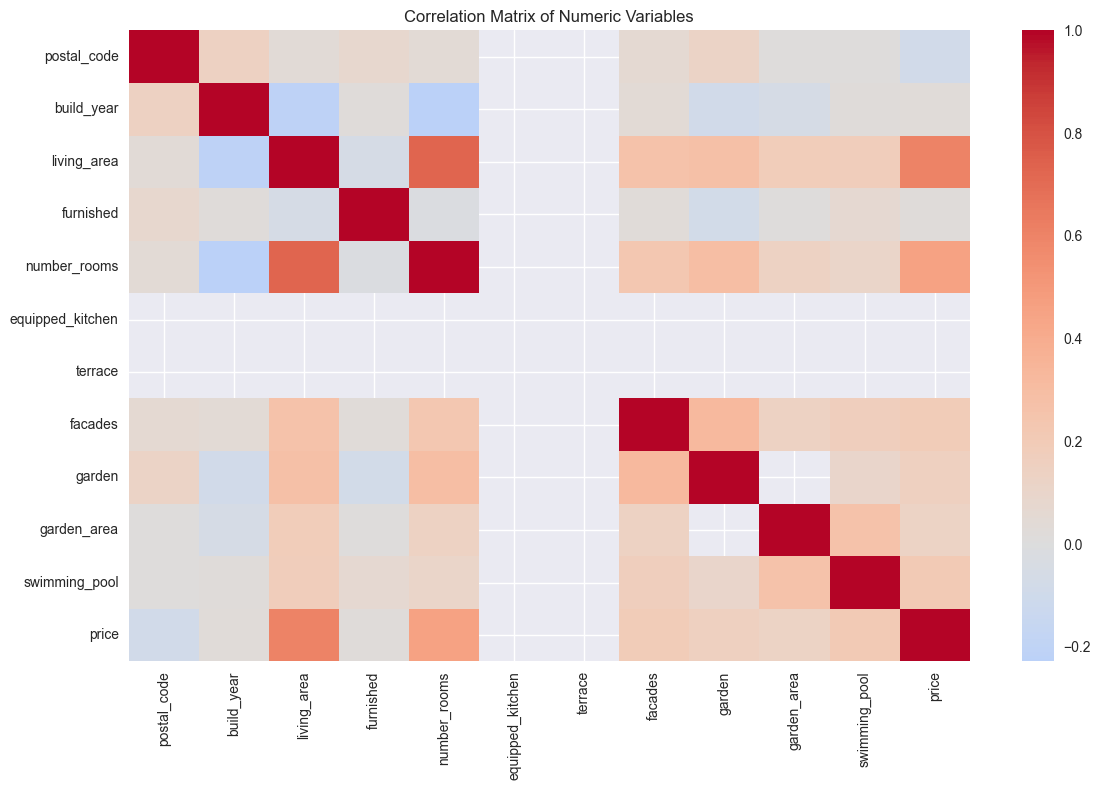

In [153]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Numeric Variables")
plt.tight_layout()
plt.show()


<b> We find that the number of rooms and living area have a high correlation, establishing a size-related group of variables that together represent the property's physical volume. Price per square meter and location factors also frequently correlate, particularly within a given region. Another minor correlation group that is typical of higher-end residences is formed by the likelihood of amenities like a garden, terrace, and swimming pool to co-occur.